# Kenya's Population Analysis

## Data Loading and Cleaning

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Setting plotting style
plt.style.use('ggplot')

In [3]:
# Loading data
data = pd.read_excel("../PRODIGY_DS_01/Data/P_Data_Extract_From_World_Development_Indicators.xlsx", sheet_name='Data', nrows=50)  # Limiting rows due to footers in document

data.head()

,Country Name,Country Code,Time,Time Code,Age dependency ratio (% of working-age population) [SP.POP.DPND],Population growth (annual %) [SP.POP.GROW],"Population, female [SP.POP.TOTL.FE.IN]","Population, male [SP.POP.TOTL.MA.IN]",Rural population [SP.RUR.TOTL],Urban population [SP.URB.TOTL],"Population, total [SP.POP.TOTL]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],GDP (current LCU) [NY.GDP.MKTP.CN]
0,Kenya,KEN,1973,YR1973,118.436201,3.488745,6452684,6307721,11254039,1506366,12760405,..,1.756600e+10
1,Kenya,KEN,1974,YR1974,118.575838,3.416893,6676963,6526985,11573393,1630556,13203949,..,2.121400e+10
2,Kenya,KEN,1975,YR1975,118.718957,3.336334,6902776,6749132,11888901,1763007,13651908,..,2.393400e+10
3,Kenya,KEN,1976,YR1976,118.871546,3.245634,7129546,6972722,12198039,1904229,14102268,..,2.907200e+10
4,Kenya,KEN,1977,YR1977,118.703614,3.313304,7369217,7208130,12520191,2057155,14577346,..,3.719800e+10


Outrightly, there are missing values in the data. These missing values will be filled with 0 because using other values can be misleading, especially in the visualizations.

In [4]:
# checking the data characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country Name                                                       50 non-null     object 
 1   Country Code                                                       50 non-null     object 
 2   Time                                                               50 non-null     int64  
 3   Time Code                                                          50 non-null     object 
 4   Age dependency ratio (% of working-age population) [SP.POP.DPND]   50 non-null     float64
 5   Population growth (annual %) [SP.POP.GROW]                         50 non-null     float64
 6   Population, female [SP.POP.TOTL.FE.IN]                             50 non-null     int64  
 7   Population, male [SP.POP.TOT

However, according to the records there are no missing values.

In [5]:
# Inspecting the missing values
data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'].value_counts()

Individuals using the Internet (% of population) [IT.NET.USER.ZS]
..             18
0               5
5.2             1
25.53293999     1
22.66877336     1
19.5            1
17.82710021     1
16.6            1
16.58785485     1
16.5            1
13              1
10.5            1
8.8             1
7.2             1
6.1             1
4.4             1
3.6             1
3.101897702     1
3.023528042     1
2.941902861     1
1.207773885     1
0.619782266     1
0.318059714     1
0.114256028     1
0.050261388     1
0.034406051     1
0.008839115     1
0.000727482     1
28.75752799     1
Name: count, dtype: int64

Missing values are represented by two fullstops (..). In this case filling missing values can be considered as replacing values.

In [6]:
# Filling missing values
data.replace({'..': 0}, inplace=True)

# Convering internet column to float type
data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'] = data['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'].astype('float')

# Dropping unwanted columns
data.drop(['Country Name', 'Country Code', 'Time Code'], axis=1, inplace=True)

In [7]:
data.head()

,Time,Age dependency ratio (% of working-age population) [SP.POP.DPND],Population growth (annual %) [SP.POP.GROW],"Population, female [SP.POP.TOTL.FE.IN]","Population, male [SP.POP.TOTL.MA.IN]",Rural population [SP.RUR.TOTL],Urban population [SP.URB.TOTL],"Population, total [SP.POP.TOTL]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],GDP (current LCU) [NY.GDP.MKTP.CN]
0,1973,118.436201,3.488745,6452684,6307721,11254039,1506366,12760405,0.0,1.756600e+10
1,1974,118.575838,3.416893,6676963,6526985,11573393,1630556,13203949,0.0,2.121400e+10
2,1975,118.718957,3.336334,6902776,6749132,11888901,1763007,13651908,0.0,2.393400e+10
3,1976,118.871546,3.245634,7129546,6972722,12198039,1904229,14102268,0.0,2.907200e+10
4,1977,118.703614,3.313304,7369217,7208130,12520191,2057155,14577346,0.0,3.719800e+10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               50 non-null     int64  
 1   Age dependency ratio (% of working-age population) [SP.POP.DPND]   50 non-null     float64
 2   Population growth (annual %) [SP.POP.GROW]                         50 non-null     float64
 3   Population, female [SP.POP.TOTL.FE.IN]                             50 non-null     int64  
 4   Population, male [SP.POP.TOTL.MA.IN]                               50 non-null     int64  
 5   Rural population [SP.RUR.TOTL]                                     50 non-null     int64  
 6   Urban population [SP.URB.TOTL]                                     50 non-null     int64  
 7   Population, total [SP.POP.TO

The data is ready for analysis.

## Exploratory Analysis

With this data we can answer questions such as:

1. What is the trend of age dependency ratio? 
2. What is the trend of internet access by the population?
3. What is the trend of real GDP? 
4. What is the trend of population growth rate?
5. What is the trend of total population?
6. What is the gender composition of the population?
7. What is the rural-urban composition of the population?
8. What sort of correlations are there between these aspects of Kenya's population?

### Trend of age dependency ratio

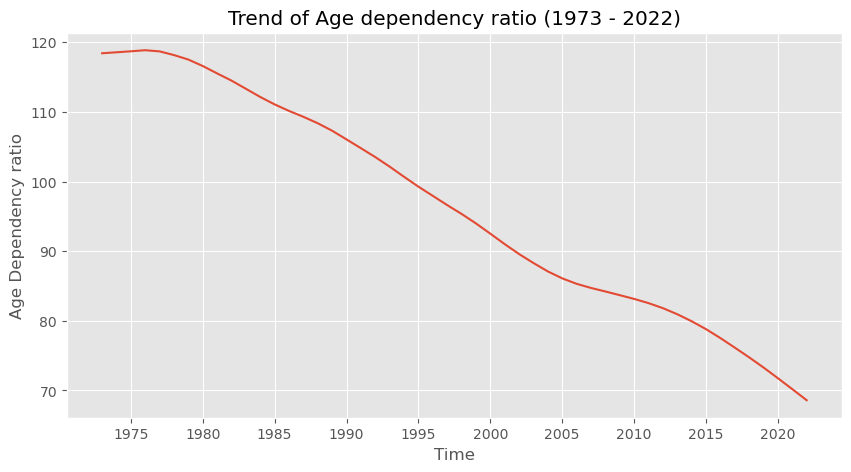

In [39]:
# 
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, y='Age dependency ratio (% of working-age population) [SP.POP.DPND]', x='Time')
plt.title("Trend of Age dependency ratio (1973 - 2022)")
plt.ylabel("Age Dependency ratio")
plt.xticks(range(1975, 2025, 5))
plt.show()
